<h1> Working with Data in Pandas </h1>

* Patrick Phelps - Manger of Data Science @ Yelp
* Frances Haugen - Product Manager @ Pinterest

<h3> Introduction </h3>

All numbers used in this exercise are part <a href='https://www.yelp.com/dataset_challenge'> Yelp's academic dataset challenge</a> to which we've added some <b>fake traffic data</b>.

In this notebook we're going to do a bit of data science using pandas, matplotlib, and some fake Yelp traffic data.  We're going to create a better SEO strategy for our platform geared around optimizing for expected future traffic in various markets and in the process learn about "long-tail" or power-law data.

This notebook is the <b>tutorial version</b>.  Remember you can always look at the answer key if you get stuck.

<h3> The Problem </h3>

Let's start with some problem framing.  Your SEO analysts tell you they need to decide if they should focus their work on low review businesses or high review businesses this quarter.  You want to have a coherent market strategy so you ask your web-ops team to get you some numbers on incoming traffic versus the number of reviews you've seen historically.

Here we'll use the yelp academic dataset to get our business information and an included csv the yelp_dataset_cumulative_value_of_a_review_in_pageviews_per_year file to represent the web-ops teams response to you on incoming traffic.  Here we've already segmented this data by market "saturation" which is a rough gauge of how saturated we think Yelp usage is in a given city.

<h3> Setting Up our Notebook: </h3>

Here we're just doing some basic python importing.  For this tutorial you'll need the following python packages:
1. pandas
2. matplotlib
3. numpy
4. json

This tutorial is made and tested for python 2.7

These next two bits are just setting up our enviornemnt, the things we have access to while we're working.  We're going to tell the notebook a few things about how it should work internally (the lines that begin with %) then add some packages that we want to be able to use.  A package is simply some modular group of code which allows us to use various bits of it.

Finally we'll set a few options related to how we're going to display plots, don't worry if you don't understand this boilerplate code, I simply included it for completeness, normally it could all be relegated to a setup script.

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

<h2> A tiny bit about jupyter notebooks </h2>

Jupyter notebooks a really wonderful way to merge code and data and notes into a single cohesive analysis.  The most important bits to understand for this tutorial is that notebooks run code based one "cells"  This text is in a cell for writing notes called a markdown cell.  Here we can use HTML tags and web markdown syntax.  What happens if you double click this cell?  Can you edit it?  

To tell the notebook to render your edits you need to "run" the cell, you can do this from the drop down menus above but it's much easier to know you can press the shift+enter keys to run a cell.

In [12]:
# This is a code cell here text needs to either be python code or commented out like this line.
# comments start with a # and tell the interpreter to ignore that line
a = 5
print 1

1


When we run a code cell (shift-enter) the notebook runs that bit of code, when we run a markdown cell what happends?  Try double clicking on this to enter edit mode, doing a bit of editing then hitting shfit-enter.  How does HTML tagging work in this sort of cell?  Can you make this BOLD?

<h2> Loading the Data </h2>

We now need to do a bit of data loading.  I've setup some helpers for you to do this but you'll need to modify the cell below which sets a variable the base_file_path.

You want to edit it to point to where you've saved the yelp_academic_dataest_business.json file and the yelp_dataset_cumulative_value_of_a_review_in_pageviews_per_year.csv.  Right not it's setup on a mac/linux system to point to where the datafiles should be living if you have a copy of the git repo and are running this notebook where you found it in the file structure.

In [13]:
base_file_path = '../data/'

A variable retains its value in the notebook until we reset it.  In the cell below try writing the code to print the base_file_path then running the cell. 

Here we'll now use the base_file_path variable to point to our two files of interest in the data folder. 

In [14]:
yelp_biz_dataset_file = base_file_path + 'yelp_academic_dataset_business.json'
yelp_market_saturation_file = base_file_path + 'yelp_dataset_cumulative_value_of_a_review_in_pageviews_per_year.csv'

What do you think the above cell does?  What happens now if you print the base_file_path, and if you print the yelp_biz_dataset_file?

Ok, so now we want to read our datafiles into the memory of the notebook.  Since we're going to read a CSV first, that's pretty easy in pandas.  We'll simply ask pandas (which we imported earlier) to use it's read_csv method on our file.  We also need to tell it a little bit about how the file is orgnized but you can ignore that for now.

In [15]:
market_data = pd.read_csv(yelp_market_saturation_file, index_col=0)

The above loads the csv into a pandas dataframe, the most important part of pandas.  It is easiest to think of a pandas dataframe as a special form of an spreadsheet.  Unlike a spreadsheet we have to interact with our dataframe with code.  Let's take a look at it first.

In [16]:
# To look at a dataframe use the .head() command.  By default this shows up-to the first 5 rows.
market_data.head()

,lower_bound_impact_for_first_ten_reviews,mean_impact_for_first_ten_reviews,upper_bound_impact_for_first_ten_reviews,lower_bound_impact_for_higher_reviews,mean_impact_for_higher_reviews,upper_bound_impact_for_higher_reviews,market_saturation
0,82.357716,135.426633,188.495550,55.497045,84.137615,97.778184,mid_market
1,23.898631,55.844838,87.791045,16.705135,22.057810,27.410485,new_market
2,36.188677,50.271565,64.354453,36.418009,44.243010,47.068010,saturated_market


This dataframe only has 3 rows so that's all we see.  We can always pass a number to df.head() to get more rows if they exist. Try playing with the head command above.  What happens if you pass it a number, can you make it only show you the first row?

So what can we say from this dataframe?  First, what is in it?  Let's look at a subsection of columns first, we do thisa by passing a list of columns we'd like to see, enclosed in square-braces.

In [17]:
market_data[[
        'market_saturation', 
        'mean_impact_for_first_ten_reviews', 
        'mean_impact_for_higher_reviews'
    ]].head()

,market_saturation,mean_impact_for_first_ten_reviews,mean_impact_for_higher_reviews
0,mid_market,135.426633,84.137615
1,new_market,55.844838,22.057810
2,saturated_market,50.271565,44.243010


In the cell below try playing with what columns are output, can you make the list of columns to print a variable like our filepaths above?  Can you use this variable to select the columns?

<b>So what do these numbers mean?</b>  For each additional review on a business in a mid-market city we expect to get (on average or at the mean) an extra 135.426 cumulative page-views per year if that review is one of the first 10 reviews for that business and 84.14 additional page-views per year if that review is after those first 10 reviews.  These are cumulative in this exercise because they take into account that more page-views = more reviews later and represent the total cumulative impact per year of a new review.

Does that make sense inuitively?  Think about it with your group for a bit and discuss.

$\\$

We might imagine that the first 10 reviews allow a business to go from completely undiscovered to discovered so they generate a lot of traffic as people discover that a place exists.  On the other hand we don't see nearly as much impact past the first 10 reviews. That makes sense too, suppose a place had 200 reviews, how much do we expect traffic to improve if it got another reivew?

For this tutorial I've simplified this to just a binary cut.  In reality there's a time-dependent surface underlying what's going on but for the exercise let's keep it simple as we'll still capture the basic idea.

So what are the other columns in our market data?  Let's transpose (rotate) our dataframe using the .T command.  Notice how I can chain commands in pandas with the dot syntax. 

In [18]:
market_data.head().T

,0,1,2
lower_bound_impact_for_first_ten_reviews,82.3577,23.8986,36.1887
mean_impact_for_first_ten_reviews,135.427,55.8448,50.2716
upper_bound_impact_for_first_ten_reviews,188.496,87.791,64.3545
lower_bound_impact_for_higher_reviews,55.497,16.7051,36.418
mean_impact_for_higher_reviews,84.1376,22.0578,44.243
upper_bound_impact_for_higher_reviews,97.7782,27.4105,47.068
market_saturation,mid_market,new_market,saturated_market


Can you chain the commands in the other order?  What happens then?  Try it below!

<h2> A little bit (I promise) on statistics </h2>

So we understand the average impact rows in this dataframe, but what are these lower and upper bound things?  

These represent our best guess on the limits of where the true impact value is given our data, they represent our uncertainty.

If you don't know any statistics, no problem, we can understand intuitively what we mean by uncertainty: if you examined just one business how confident would you be in what you saw holding true for all the millions of businesses on Yelp?  Would you go tell your boss to enact action plans based on that one example?

Probably not, we wouldn't be very sure what to expect for every business of the millions of businesses on Yelp because we had very limited information, just that one business.  But we might expect that if we saw 10 businesses we'd be a bit more confident in what we had observed, and if we saw thousands even more confident.  What we want to do is be able to tell our boss not just where the average is, but quantify this "confidence" we have given how many businesses we've looked at.

Diving a bit more into the statistics, these bound colums are what are called the 95% credible interval, this sounds really fancy but is actually pretty easy to understand.

<h3> What do we mean when we say uncertainty in stats? </h3>

Let's unpack what a credible interval is in human English.  To do this, we'll invoke the favorite example of staisticians: a simple coin toss.  This might seem a bit non-sequitor, but coin tosses are a great way to illustrate basic concepts.

Imagine, I tell you I have a coin and ask you to guess how often you think it will land heads if I flip it 100 times.  Did you guess around 50?  Why? Discuss with your group, did they come to a similar conclusion?

$\\$

What you just did is called setting a "prior," you used your knowledge and expereince (prior belief) based on other coins to estimate that most coins flip heads and tails with about even chances.  Yay, so now I flip the coin 100 times and it comes up heads 52 times, do you think this is still a fair coin?

I imagine that you still do, but why?  It didn't come up exactly 50 times heads so why do we still believe it is a fair coin? 

$\\$
Did you say something like "Of course a fair coin can sometimes result in not exactly 50 heads in 100 flips there's going to be some wiggle or variation each time you do it".  

That wiggle is what we capture in stats with what we call our credible interval.  A 95% credible interval bound reperesents (roughly) the region of outcomes we'd expect to come up 95% of the time. Occasionally, 5% of the time, a fair coin will come up wtih more extreme numbers of heads than we'd but we expect 95% of the probability to be within the bounds.

Let's return to our dataframe.

In [19]:
market_data.head().T

,0,1,2
lower_bound_impact_for_first_ten_reviews,82.3577,23.8986,36.1887
mean_impact_for_first_ten_reviews,135.427,55.8448,50.2716
upper_bound_impact_for_first_ten_reviews,188.496,87.791,64.3545
lower_bound_impact_for_higher_reviews,55.497,16.7051,36.418
mean_impact_for_higher_reviews,84.1376,22.0578,44.243
upper_bound_impact_for_higher_reviews,97.7782,27.4105,47.068
market_saturation,mid_market,new_market,saturated_market


We can now understand what our lower and upper bound on impact means, these are our 95% credible interval bounds on the mean impact, sometimes businesses will see lower impact from their reviews and sometimes they'll see more than the mean impact, but 95% of the time their impact will be between the lower and upper bound.  

<h2> Working with json </h2>

One of the things we can do in Jupyter notebooks is define helper functions that live throughout the life of the notebook.  Here I define a basic function to read in a json file, which for formatting reasons is a bit harder than csv's.  Json is a formatting syntax for files that's a bit more flexible than csv but the price we pay is that we then need to put in more work to read it.

Here I define a function with python.  A function represents a reusable piece of code.  Once you run this cell
you'll be able to call the json_reading_function from any other cell below or above this one.  Cells in jupyter
notebooks care about run order not place on the page.
If you need to modify this function you'll need to re-run this cell (shift-enter) to updated the working memory copy
of it in your notebook.

In [20]:
def json_reading_function(file_path):
    with open(file_path) as f:
        df = pd.DataFrame(json.loads(line) for line in f)
    
    return df

If you run the above cell does the number to the left of the cell change?  What do you think this represents?  To get a feel for functions try filling in the function below.  We want to create a function where you can pass in two numbers and get back their sum.

In [ ]:
def sum_two_number(num1, num2):

How do you call your function?  Like this:

In [21]:
biz_data = json_reading_function(yelp_biz_dataset_file)

Try calling your sum_two_number function on a few numbers like 0 and 1, 1.3 and 4.7, and -15 and 15.  Does it work?

Ok, let's look at our biz data can first look at the columns available using .head() like we did previously.  Try looking at 3 rows transposed below.

Ah, lots of information here.  From the Yelp academic dataset guide we know that each row in this dataframe represents just one business at a specific moment in time, it's like snapshot.
Here we can get the busienss location information, it's categories and city, it's hours, name, if it is still open and operational, and it's review count and average rating.  Finally we get information about it's attributes as a json blob in one of the dataframe columns, we'll ignore that for this work.

<h3> Making a histogram </h3>

One of the best parts of Pandas is the super useful and easy interface for making plots.  let's do a quick histogram of our review count and set the scale to logrithmic on the y-axis.

We'll then play around a bit with the histogram command to get a sense what it can do.

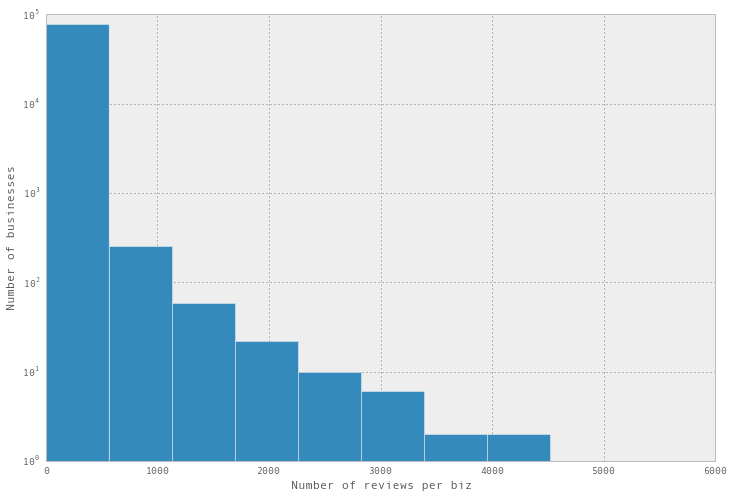

In [22]:
# we tell the biz_data dataframe to make a histogram of the review_counts and it returns
# a graphical axis object we call ax here.
ax = biz_data.review_count.hist()
# Here we tell our graphical object to have a logrithmic scale in y
# what happens if you comment out this line?
ax.set_yscale('log')
# Here we do a little labeling of our y and x-axis, you can play around with it
ax.set_xlabel('Number of reviews per biz')
ax.set_ylabel('Number of businesses')

One of the things we can do with histograms is bin them with different numbers of bins or buckets, the figure above had 10 buckets (the default).  Try to figure out how to set a different number of bins below.

In [23]:
#hint: you need to tell the histogram it needs more bins here
ax = biz_data.review_count.hist()

ax.set_yscale('log')
ax.set_xlabel('Number of reviews per biz')
ax.set_ylabel('Number of businesses')

How are these two plots different?  Why?  Would the story you felt you got from each plot be different?

Let's try some other basic 2-D plotting to get a hang of things, suppose we wanted to plot number of reviews versus average rating?  That's two columns so we don't want to histogram anymore, we want to use the .plot command.

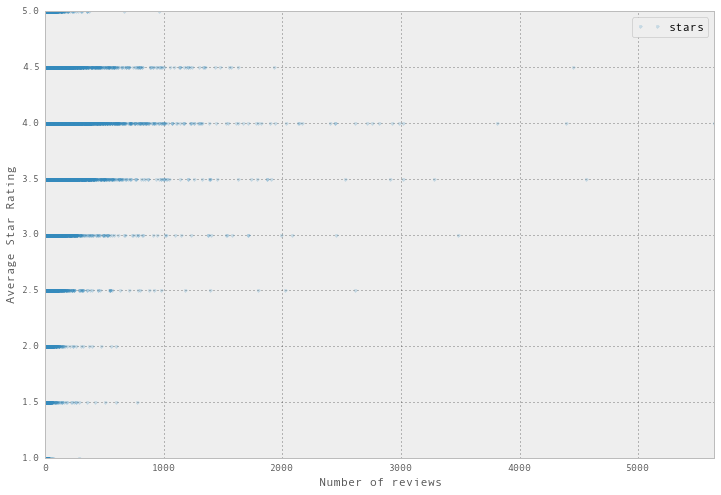

In [17]:
ax = biz_data.plot(x='review_count', y='stars', linestyle='', marker='.', alpha=0.2)
ax.set_xlim([0, biz_data.review_count.max()])
ax.set_xlabel('Number of reviews')
ax.set_ylabel('Average Star Rating')

Play around with the plotting options above, what do they do as you tinker with them?  Can you change which columns are plotted against each other?

What story about businesses does this tell us?  Can your group think of any reasons the plot might have this shape?  Try playing around with some of the above arguments to the plot function, what do they do and why?

<h2> Working with Groupby </h2>

Ok, let's return to our problem at hand, a coherent SEO strategy.  Our SEO data comes by market saturation, let's see if we can corral/transofrm our business data to decide where we might choose those market saturation levels.  Here we'll use two methods .groupby and .agg (aggregate) syntax to slice up our data.

In [24]:
city_state_groups = biz_data.groupby(['state', 'city'])

In a groupby we ask pandas to setup artifical groups within our dataframe, when we operate on the groups we don't have to worry about anything "crossing over" from one group to another.  We can group along multiple dimensions states and cities for example or just one.  Try playing around a bit to see how things vary.

In [25]:
city_state_data = city_state_groups.agg({
        'business_id': pd.Series.nunique,
        'review_count': 'sum'
    })

And in .agg we aggregate internally to each group to produce a summary.  The one caveat to aggregation is we need to tell pandas how we want to aggregate.  We can either give it a function to apply to the data, like pd.Series.nunique which counts uniques or for some really common aggregations a simple string which pandas understands means summation or take the first etc.

Let's look at the city_state_data below using our favorite commands head and .T.  

Do you have an aggregated dataframe?  Is there anything odd about it?

You should see there are some oddites like how come Montreal only has 4 reviews and 1 biz?  Something's odd.  Let's do a quick sort to figure it out.

In [21]:
city_state_data.sort_values(by='review_count', ascending=False).head(10).T

state               NV      AZ                   NC     AZ         PA  \
city         Las Vegas Phoenix Scottsdale Charlotte  Tempe Pittsburgh   
review_count    957676  330437     179521    131833  95650      94942   
business_id      17422   10629       5139      5188   2773       3337   

state               NV       QC       AZ         
city         Henderson Montréal Chandler   Mesa  
review_count     85463    69973    64921  63897  
business_id       2839     3891     2425   3190

Ah, our data aren't fully clean, that's pretty common, for example Montreal vs Montréal.  Since we're just doing a minor example we won't spend too much time cleaning our data but let's quickly see how number of reviews stack-up.

In [26]:
def clean_city_str(city_str):
    temp = city_str.replace(' ', '')
    temp = temp.lower()
    return temp

In [27]:
biz_data['city_key'] = biz_data.city.apply(clean_city_str)

That was a bit fast, let's breakdown what we just did.  Pandas can quickly become so efficient we can lose track of what we did.  Two cells ago I defined a function to clean city names called clean_city_str.  It just removes whitespace and lower cases the string.  

One cell ago I used a new pandas command, .apply()  apply does what you might think, it applies a function to each element of a column in a dataframe. 

<h3> Challenge Time </h3>

Ok, let's put all these little steps together.  In the next two cells I want you to.

1. Take biz_data and groupby state and our new column city_key.  I then want you to apply an aggregate taking the unique number of business_ids (a count of how many businesses there are) and summing the review count like we did above.  Remember you can chain the .groupby and .agg syntax like you did .head and .T 

2. In the second cell let's plot this aggregate data.  You'll definitely want to chain syntax here.  We'll first apply .sort_values to our aggregate.  We'll want to sort by the review_count and in descending order like we did above.  We'll then want to take the top 100 cities and plot them in a bar plot.  To make the plot command do a bar plot all you have to do is pass in kind='bar' like we did with the bins of a histogram before.

If you get stuck work with your group for a bit but also remember the answer key is available and you can always ask.


You should see more long-tail (power-law) data. As you may have guessed these sorts of patterns are super common when we look at real world applications and web data.  Time for us to start thinking about how to deal with them.

<h1> Tricks for dealing with long-tail data </h1>

Let's examine a few simple steps when working with long-tail data before moving back to our problem.  The first trick is normalization.  When we normalize we want to take out extraneous information that may be making it harder to see what we care about.

For example we know our above cities probably have different populations and different numbers of businesses which means the raw-number of reviews in say Lead, SD and Las Vegas aren't good indicators of market saturation.  We want to take out this population effect:  A common way to do this is normalization or dividing our total reviews among the businesses to get the average # reviews per business in a city.

This isn't perfect, but as we'll see it can get us a long way towards an answer.  Luckly it's easy in pandas to take the ratio of two columns.

In [ ]:
# try running this cell and see what it outputs
city_state_data.review_count / city_state_data.num_biz.astype('float')

Ok, now let's take that output and assign it to a new column in our dataframe, maybe 'mean_num_reviews_per_biz'  If you don't remember how to do that take a look back and talk to your group.

And of course our favorite trick, let's make another bar-plot of sorted_values below.  This time I left a little bit filled in for you you just need to fill in the bits between the < and >'s

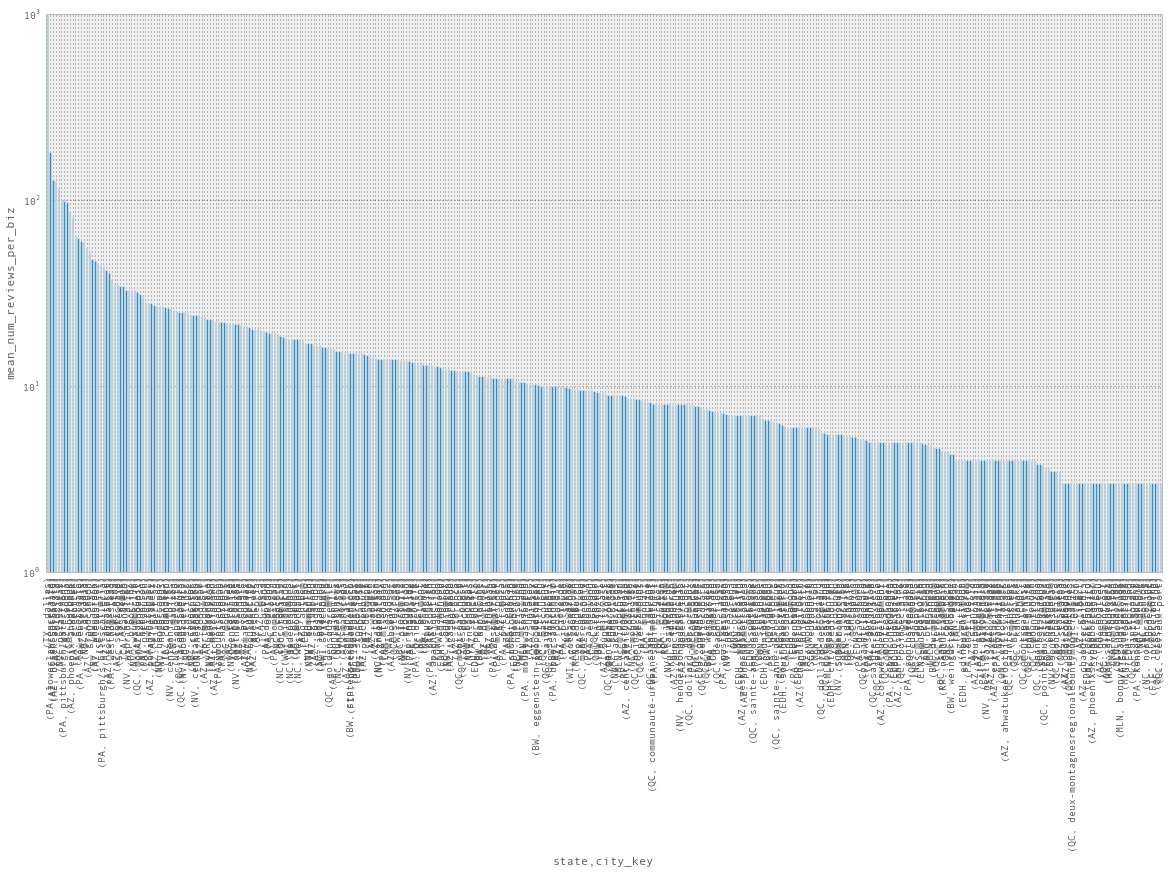

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
city_state_data.sort_values(
    by=<??????>, 
    ascending=False
).mean_num_reviews_per_biz.plot(kind=<????>, ax=ax)
ax.set_yscale('log')
ax.set_ylabel('mean number of reviews per biz')

So still long-tailed drat, hmm, why might the average be misleading here?  Think about it for a second then run the next cell.

In [ ]:
city_state_data.sort_values(
    by='mean_num_reviews_per_biz', 
    ascending=False
).head(20)

See anything?  Do most of our extremely high reviews per biz cities only have a small number of businesses, does this sound like the discussion we had before about confidence?

How can we treat these?  We need to take into account our knowledge of how many businesses are present as well.

We're not going to make a big fuss on getting exactly 95% credible intervals here, it's a tutorial but we can compute what's called the standard error on the mean.  

In [30]:
def standard_err(x):
    return np.std(x)/np.sqrt(len(x))

In [31]:
city_state_data['std_err'] = biz_data.groupby(['state', 'city_key']).agg({
        'review_count': standard_err
    })

Now to use this information.  We'll use the standard error to set a lower bound on the mean, we're techinically treating these as normals but this is just an approximation.  In reality we would use something like scipy's stats models to get confidence bounds or boostrap but for the tutorial let's keep it simple.

In [32]:
# cut to eliminate places with no deviation.
city_state_data = city_state_data[city_state_data.std_err > 0]

In [33]:
def compute_lower_conf_estimator(row):
    return max(x.mean_num_reviews_per_biz - 1.96 * x.std_err, 0)

Ok we need to apply our compute_lower_conf_estimator function now.  I've partially filled it in for you but you've got to figure out the apply statement.

In [33]:
city_state_data['lower_conf_mean_review'] = city_state_data.apply(
    <????>,
    1
)

Now let's histogram our lower_conf_mean_review column with 100 bins.  We might see something pretty different.

Is there anywhere you could see places to that might define clumps of businesses that could be new markets, saturated markets, and mid-markets?

<h1> Putting it all together </h1>

Did you follow the above cells?

What did the "cut" do and why?  Are their other cuts you could imagine doing to the data?  Finally we know the apply syntax but what's this lambda stuff?  lambda is a shortcut, it's 



So we're finally ready to ask our basic question, how can we make a coherent statement of where to focus or SEO efforts.  To recap:

1. We have data on the value of how much traffic we hope to drive per review added in our market_data dataframe segemented by market saturation.
2. We have data on per city in the academic dataset how saturated the various markets might be in terms of # reviews per biz in our city_state_data dataframe.
3. We have data on the number of reviews per business currently in each city in our biz_data dataframe.


<h3> Defining a clear objective </h3>

Critical to how we answer a question is identifying what we wish to use to measure success.  Here we'll use a very simple proxy.  We want to generate the maximal new page-views per year via our SEO startegy, we don't know how much work various types of SEO are but what we want to generate is a good sense of the trade offs.

<h3> Assign market-saturation levels to cities </h3>

From our data per city we need to define saturation levels.  Looking at the distrbution let's make the following distinctions.  This next coulpe cells are a bit fancy.  I'm going to directly manipulate the plotting functions to do a bit of annotation.  As long as you change the next cell so that it has the variable you used above for your aggregated citykey state data it should work.

In [34]:
city_state_data = <Your df here>

In [ ]:
fig, ax = plt.subplots()
city_state_data.lower_conf_mean_review.hist(bins=100, ax=ax, color='#0073bb')
ax.set_ylabel('Number of cities')
ax.set_xlabel('lower bound on mean reviews per biz')

# Add transparent rectangles
head_patch = plt.matplotlib.patches.Rectangle((0,0), 1.5, 40, alpha=0.25, color='#41a700')
middle_patch = plt.matplotlib.patches.Rectangle((1.5,0), 7, 40, alpha=0.25, color='#0073bb')
tail_patch = plt.matplotlib.patches.Rectangle((8.5,0), 70, 40, alpha=0.25, color='#d32323')
ax.add_patch(head_patch)
ax.add_patch(middle_patch)
ax.add_patch(tail_patch)

# Add text annotations
ax.text(0.5,25,"New Market", color='#41a700', fontsize=16, rotation=90)
ax.text(7,25,"Mid Market", color='#0073bb', fontsize=16, rotation=90)
ax.text(30,25,"Saturated Market", color='#d32323', fontsize=16)

Let's now apply these boundaries to our data cities using a function  make sure to fill in the <????> areas

In [36]:
def assign_market_saturation(lower_bound_mean_reviews):
    saturation_level = None
    if lower_bound_mean_reviews <= <????>:
        saturation_level = 'new_market'
    elif lower_bound_mean_reviews <= <????>:
        saturation_level = 'mid_market'
    else:
        saturation_level = 'saturated_market'
        
    return saturation_level

Ok let's apply this function to our city_state_data's lower_conf_mean_review

In [37]:
city_state_data['market_saturation'] = city_state_data.<????>

Take a look at city_state_data below, do you see your market saturation information?

Cool, now that we know per city the market saturation we can join it onto our per business data.

In [39]:
state_city_saturation_df = city_state_data[['state', 'city_key', 'market_saturation']]

In [40]:
biz_data['city_key'] = biz_data.city.apply(clean_city_str)

In [41]:
# Merge on market saturation data
biz_data = biz_data.merge(state_city_saturation_df, how='inner', on=['state', 'city_key'])

<h1> Where should we focus? </h1>

So let's examine the impact of our focus now, to gauge how we might see impact, suppose we could add 1 review to all businesses, what would we expect to see in page-views over the course of the year in our businesses that currently have fewer than 10 reviews and those that have over 10 reviews?

In [42]:
lookup_key = {
    ('<10', 'lower'): 'lower_bound_impact_for_first_ten_reviews',
    ('<10', 'mean'): 'mean_impact_for_first_ten_reviews',
    ('<10', 'upper'): 'upper_bound_impact_for_first_ten_reviews',
    ('10+', 'lower'): 'lower_bound_impact_for_higher_reviews',
    ('10+', 'mean'): 'mean_impact_for_higher_reviews',
    ('10+', 'upper'): 'upper_bound_impact_for_higher_reviews'
}

In [36]:
def yearly_impact_of_one_more_review(biz_row, impact='mean'):
    impact_measures = market_data[market_data.market_saturation == biz_row.market_saturation]
    if biz_row.review_count >= 10:
        lookup_review_count = '10+'
    else:
        lookup_review_count = '<10'
    
    return impact_measures[lookup_key[(lookup_review_count, impact)]].values[0]

In [ ]:
biz_data['mean_added_yearly_pageviews'] = biz_data.apply(
    lambda x: yearly_impact_of_one_more_review(x, 'mean'), 
    1
)
# Use your new found knowledge and the bit above to fill in these extra ones, how would you
# tell the function you want lower or upper values?
biz_data['lower_added_yearly_pageviews'] = <????>
biz_data['upper_added_yearly_pageviews'] = <????>

In [ ]:
biz_data['review_bucket'] = biz_data.review_count.apply(lambda x: '10+' if x >= 10 else '<10')

What did that do?  What is the review_bucket and how does it relate to the review count?  Take a look at the dataframe in the cell below to find out.

In [ ]:
results = biz_data.groupby(['review_bucket']).agg(
    {
        <???? your mean column here>: 'sum',
        'lower_added_yearly_pageviews': <????>,
        <???? upper column ????> : <???? operator ????>
    } 
)

results

In [ ]:
# time for a new kind of plot the box plot
ax = results.T.plot(kind='box')
ax.set_ylabel('Expected Pageviews')
# what does this next line do?
ax.set_ylim([0, 3000000])
ax.set_xlabel('Review segement to target')

So at first glance it looks like we're better off focusing on less reviewed businesses, but is there any subtlties here?

In the cell below lets also group by our market saturation column in addition to review bucket and see how that impacts our answer.

In [48]:
by_market_saturation_results = <????>

In [ ]:
ax = by_market_saturation_results[
    [
        'mean_added_yearly_pageviews', 
        'lower_added_yearly_pageviews', 
        'upper_added_yearly_pageviews'
    ]
].T.plot(kind='box')
ax.set_yscale('log')
plt.xticks(rotation=70)

We can now get a rough estimate of the trade-offs we'd be willing to make in SEO.  If we're told it's much harder to get early reviews we'd know that may not be worth the ROI and by what factor in mid, new, and saturated markets.